In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\HP'

In [3]:
os.chdir('E:\\Shubham\\sample csv\\SalesAnalysis')
os.getcwd()


'E:\\Shubham\\sample csv\\SalesAnalysis'

In [4]:
file_list = [file for file in os.listdir('./Sales_Data/')]
file_list

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [5]:
all_files = pd.DataFrame()
for file in file_list:
    file_read = pd.read_csv('./Sales_Data/'+ file)
    all_files = pd.concat([all_files, file_read])
all_files.to_csv('allmonthdata.csv', index = False)

In [6]:
all_data = pd.read_csv('allmonthdata.csv')  
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
#all_files_100 = pd.read_csv('allmonthdata.csv', nrows = 100)
#all_files_100
#all_files_100_200 = pd.read_csv('allmonthdata.csv', skiprows = 101, nrows = 100) 
#all_files_100_200

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
all_data.shape #all_data.shape[0]  = 186850

(186850, 6)

In [10]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
#DATA Cleaning

In [12]:
all_data.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
dtype: int64

In [13]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
clean_data = all_data.dropna(axis = 0, how = 'any')
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [15]:
clean_data.shape #initially = 186850 - 186305 = 545

(186305, 6)

# Q1: Find month with maximum number of sales?


In [16]:
#let us get month first
clean_data['Order Date'].dtypes

dtype('O')

In [17]:
#let us convert it to datetime format
import datetime


In [18]:
#clean_data['Order Date']  = pd.to_datetime(clean_data['Order Date'], format = '%m/%d/%y %H:%M') #09/30/19 00:18
pd.to_datetime(clean_data.loc[0, 'Order Date'], format = '%m/%d/%y %H:%M')

Timestamp('2019-04-19 08:46:00')

In [19]:
#then why above code not working on entrie columns, leet us see all the values of the column - too much values, let us convert strings first to numeric
#pd.to_numeric(clean_data['Order Date'])
#clean_data['Order Date'] = clean_data['Order Date'].astype('int32')

In [20]:
pd.set_option('display.max_rows', 1000)
clean_data.head(1000) #so oi got to know by this that at row 519  Order Date is Order Date not any number or date
#so i have to remove such data 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [21]:
clean_data.loc[519]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 519, dtype: object

In [22]:
clean_data.loc[0]

Order ID                                  176558
Product                     USB-C Charging Cable
Quantity Ordered                               2
Price Each                                 11.95
Order Date                        04/19/19 08:46
Purchase Address    917 1st St, Dallas, TX 75001
Name: 0, dtype: object

In [23]:
#see the difference
clean_data = clean_data[clean_data['Order Date'] != 'Order Date']
clean_data['Order Date']=pd.to_datetime(clean_data['Order Date'], format = '%m/%d/%y %H:%M')
clean_data

C:\Users\HP\AppData\Local\Temp/ipykernel_25728/85584302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Order Date']=pd.to_datetime(clean_data['Order Date'], format = '%m/%d/%y %H:%M')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [24]:
clean_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [25]:
clean_data['Monthname'] = clean_data['Order Date'].dt.month_name()
clean_data['Month'] = clean_data['Order Date'].dt.month
clean_data

C:\Users\HP\AppData\Local\Temp/ipykernel_25728/38370617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Monthname'] = clean_data['Order Date'].dt.month_name()
C:\Users\HP\AppData\Local\Temp/ipykernel_25728/38370617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Month'] = clean_data['Order Date'].dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,9
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,9
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,9


In [26]:
clean_data['Quantity Ordered'] = pd.to_numeric(clean_data['Quantity Ordered'])
clean_data['Price Each'] = pd.to_numeric(clean_data['Price Each'])

clean_data['Sales'] = clean_data['Quantity Ordered']*clean_data['Price Each']
clean_data

C:\Users\HP\AppData\Local\Temp/ipykernel_25728/3438235154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Quantity Ordered'] = pd.to_numeric(clean_data['Quantity Ordered'])
C:\Users\HP\AppData\Local\Temp/ipykernel_25728/3438235154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Price Each'] = pd.to_numeric(clean_data['Price Each'])
C:\Users\HP\AppData\Local\Temp/ipykernel_25728/3438235154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,9,379.99


In [27]:
#month with max sales
monthly_sales = clean_data.groupby(['Month', 'Monthname']).sum()
monthly_sales

,,Quantity Ordered,Price Each,Sales
Month,Monthname,,,
1,January,10903,1811768.38,1822256.73
2,February,13449,2188884.72,2202022.42
3,March,17005,2791207.83,2807100.38
4,April,20558,3367671.02,3390670.24
5,May,18667,3135125.13,3152606.75
6,June,15253,2562025.61,2577802.26
7,July,16072,2632539.56,2647775.76
8,August,13448,2230345.42,2244467.88
9,September,13109,2084992.09,2097560.13


In [28]:
monthwisesales = pd.pivot_table(clean_data, index = ['Month', 'Monthname'], values = 'Sales', aggfunc = 'sum')
monthwisesales

,,Sales
Month,Monthname,
1,January,1822256.73
2,February,2202022.42
3,March,2807100.38
4,April,3390670.24
5,May,3152606.75
6,June,2577802.26
7,July,2647775.76
8,August,2244467.88
9,September,2097560.13


In [29]:
month_list = []
for key, value in monthwisesales.index:
    month_list.append(value)
print(month_list)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


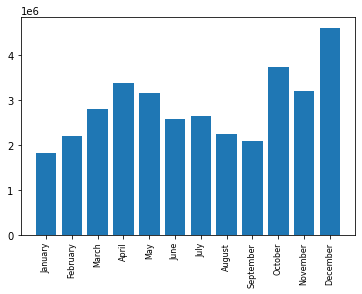

In [31]:
x_axis = month_list
y_axis = monthwisesales['Sales']
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, rotation = 'vertical', size = 8)
plt.show()

# Q2: US city with highest sales?

In [32]:
clean_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,9,379.99


In [33]:
#write function then new col and apply function
def get_city_name(address):
    return address.split(',')[1]
def get_state_name(address):
    return address.split(',')[2].split(' ')[1]

clean_data['City'] = clean_data['Purchase Address'].apply(lambda x: get_city_name(x)+'('+get_state_name(x)+')')

C:\Users\HP\AppData\Local\Temp/ipykernel_25728/1437627833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['City'] = clean_data['Purchase Address'].apply(lambda x: get_city_name(x)+'('+get_state_name(x)+')')


In [34]:
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,9,8.97,Los Angeles(CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,9,700.00,San Francisco(CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,9,700.00,San Francisco(CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,9,379.99,San Francisco(CA)


In [35]:
city_sales = pd.pivot_table(clean_data, index = 'City', values = 'Sales', aggfunc = 'sum').reset_index()
city_sales

,City,Sales
0,Atlanta(GA),2795498.58
1,Austin(TX),1819581.75
2,Boston(MA),3661642.01
3,Dallas(TX),2767975.40
4,Los Angeles(CA),5452570.80
5,New York City(NY),4664317.43
6,Portland(ME),449758.27
7,Portland(OR),1870732.34
8,San Francisco(CA),8262203.91
9,Seattle(WA),2747755.48


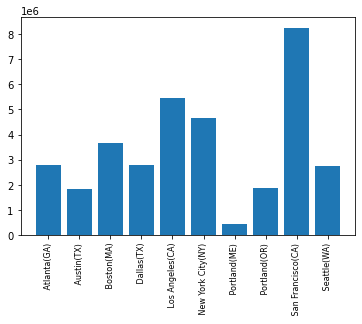

In [36]:

plt.bar(city_sales['City'], city_sales['Sales'])
plt.xticks(city_sales['City'], rotation = 'vertical', size = 8)
plt.show()

# Q3: What time to put advertisment to get maximum sales?

In [37]:
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA)


In [38]:
clean_data['hour'] = clean_data.loc[:, 'Order Date'].dt.hour
clean_data

C:\Users\HP\AppData\Local\Temp/ipykernel_25728/2829633291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['hour'] = clean_data.loc[:, 'Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90,Dallas(TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99,Boston(MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,9,8.97,Los Angeles(CA),20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,9,700.00,San Francisco(CA),16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,9,700.00,San Francisco(CA),7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,9,379.99,San Francisco(CA),17


In [39]:
hour_sales = pd.pivot_table(clean_data, values = 'Sales', index = 'hour', aggfunc = sum).reset_index()
hour_sales

,hour,Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


C:\Users\HP\AppData\Local\Temp/ipykernel_25728/1732400705.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(hour_sales['hour'], hour_sales['Sales'], 'r.', marker = 'o')


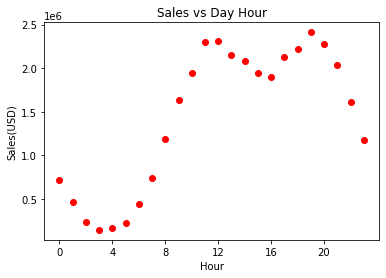

In [40]:
plt.plot(hour_sales['hour'], hour_sales['Sales'], 'r.', marker = 'o')
valskip = max(len(hour_sales['hour'])//6, 1)
xaxis = list(hour_sales['hour'])
plt.xticks(xaxis[::valskip])
plt.xlabel('Hour')
plt.ylabel('Sales(USD)')
plt.title('Sales vs Day Hour')
plt.show()

# Q4: What product sold the most?

In [41]:
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90,Dallas(TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99,Boston(MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),9


In [42]:
product_sales = pd.pivot_table(clean_data, values = 'Sales', index = 'Product', aggfunc = sum).reset_index()
product_sales

,Product,Sales
0,20in Monitor,454148.71
1,27in 4K Gaming Monitor,2435097.56
2,27in FHD Monitor,1132424.50
3,34in Ultrawide Monitor,2355558.01
4,AA Batteries (4-pack),106118.40
5,AAA Batteries (4-pack),92740.83
6,Apple Airpods Headphones,2349150.00
7,Bose SoundSport Headphones,1345565.43
8,Flatscreen TV,1445700.00
9,Google Phone,3319200.00


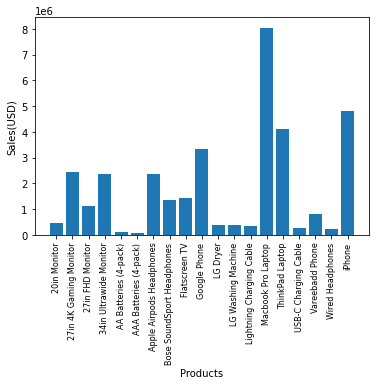

In [43]:
plt.bar(product_sales['Product'], product_sales['Sales'])
plt.xticks(product_sales['Product'], rotation = 'vertical', size = 8)
plt.xlabel('Products')
plt.ylabel('Sales(USD)')

plt.show()


In [44]:
#instead of this let us plot sales count as above plot is not giving a good idea as 10 iphones cost = 10000000 chargers :)

In [45]:
clean_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90,Dallas(TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99,Boston(MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),9


In [46]:
product_qty_ordered = pd.pivot_table(clean_data, values = 'Quantity Ordered', index = 'Product', aggfunc = sum).reset_index()
product_qty_ordered

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [48]:
import numpy as np
product_mean_price = pd.pivot_table(clean_data, values = 'Price Each', index = 'Product', aggfunc = np.mean).reset_index()
product_mean_price

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


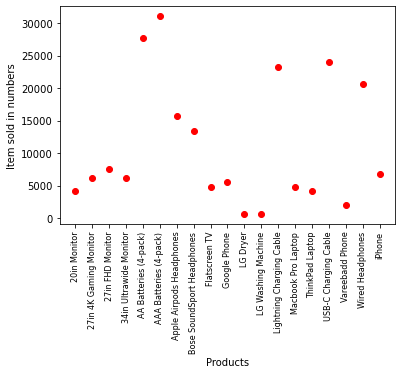

In [49]:

plt.scatter(product_sales['Product'], product_qty_ordered['Quantity Ordered'], color = 'r')
#plt.bar(product_sales['Product'], product_sales['Sales'])
plt.xticks(product_sales['Product'], rotation = 'vertical', size = 8)
plt.xlabel('Products')
plt.ylabel('Item sold in numbers')
plt.show()

In [ ]:
#let us superimpose above two plot

C:\Users\HP\AppData\Local\Temp/ipykernel_25728/3890470431.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_sales['Product'], rotation = 'vertical', size = 8)


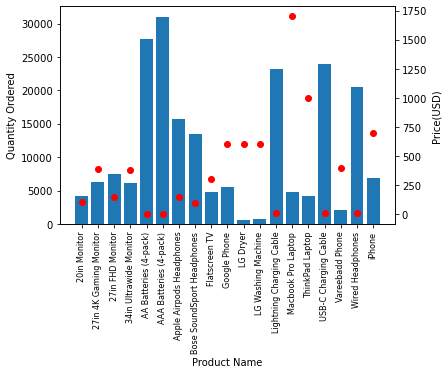

In [50]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_sales['Product'], product_qty_ordered['Quantity Ordered'])
ax2.scatter(product_sales['Product'], product_mean_price['Price Each'],color = 'r' )


ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price(USD)')
ax1.set_xticklabels(product_sales['Product'], rotation = 'vertical', size = 8)
plt.show()



# Q4: Item sold together?

In [51]:
clean_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,4,23.90,Dallas(TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,4,99.99,Boston(MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),9
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",April,4,11.95,San Francisco(CA),13
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",April,4,99.99,Seattle(WA),7
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",April,4,11.95,Atlanta(GA),10
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,4,1700.00,San Francisco(CA),10
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",April,4,11.99,Boston(MA),14


In [52]:
together = clean_data[clean_data['Order ID'].duplicated(keep = False)]
together.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales,City,hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,11.95,Los Angeles(CA),19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,4,99.99,Boston(MA),11


In [53]:
together['sold_together'] = together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
together

C:\Users\HP\AppData\Local\Temp/ipykernel_25728/500693782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  together['sold_together'] = together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monthname,Month,Sales,City,hour,sold_together
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,4,11.99,Los Angeles(CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,600.00,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,4,11.95,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,4,99.99,Boston(MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,9,3.84,Atlanta(GA),20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,9,11.99,Atlanta(GA),0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,9,5.98,Atlanta(GA),0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,9,600.00,San Francisco(CA),13,"Google Phone,USB-C Charging Cable"


In [54]:
together = together[['Order ID', 'sold_together']].drop_duplicates()
together = together.reset_index(drop = True) 
together

,Order ID,sold_together
0,176560,"Google Phone,Wired Headphones"
1,176574,"Google Phone,USB-C Charging Cable"
2,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176586,"AAA Batteries (4-pack),Google Phone"
4,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
7131,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
7132,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
7133,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
7134,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [55]:
#count pairs
grouped = list(together['sold_together'])
grouped[1]

'Google Phone,USB-C Charging Cable'

In [64]:
from itertools import combinations
from collections import Counter

count = Counter()

for group in together['sold_together']:   #df['grouped'] = Google Phone,Wired Headphones
    group_list = group.split(',') #row_list = ['Google Phone', 'Wired Headphones']
    count.update(Counter(combinations(group_list,2))) #if we write 3 in place of 2 then it will give most common 3 items in place of 2

common = list()
item = list()

for key,value in count.most_common(10):#key - ('iPhone', 'Lightning Charging Cable') #value - 1005
    common.append(value)
    item.append(key)
print(common)
print(item)
    

[1005, 987, 447, 414, 361, 360, 220, 160, 143, 92]
[('iPhone', 'Lightning Charging Cable'), ('Google Phone', 'USB-C Charging Cable'), ('iPhone', 'Wired Headphones'), ('Google Phone', 'Wired Headphones'), ('Vareebadd Phone', 'USB-C Charging Cable'), ('iPhone', 'Apple Airpods Headphones'), ('Google Phone', 'Bose SoundSport Headphones'), ('USB-C Charging Cable', 'Wired Headphones'), ('Vareebadd Phone', 'Wired Headphones'), ('Lightning Charging Cable', 'Wired Headphones')]


In [66]:
data = {'item_group': item, 'count' : common}
item_group_count = pd.DataFrame(data)
item_group_count


,item_group,count
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",160
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92
